In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# List all the csv files in the folder

csv_files = [x for x in os.listdir('errors') if x.endswith('.csv')]
csv_files

['CO2_PB.csv',
 'CO2_WM.csv',
 'NO2_PB.csv',
 'NO2_WM.csv',
 'NO_PB.csv',
 'NO_WM.csv']

In [3]:
## combine all csv files by column

csv_list=[]
for i in range(0, len(csv_files)):
    csv=pd.read_csv('errors/'+csv_files[i])
    csv_list.append(csv)

In [21]:
df = pd.concat(csv_list, axis=1)
df

,Test RMSE: CO$_2$ (ppm) (ASA),Test R$^2$: CO$_2$ (ASA),Test RMSE: CO$_2$ (ppm) (WM),Test R$^2$: CO$_2$ (WM),Test RMSE: NO$_2$ (ppb) (ASA),Test R$^2$: NO$_2$ (ASA),Test RMSE: NO$_2$ (ppb) (WM),Test R$^2$: NO$_2$ (WM),Test RMSE: NO (ppb) (ASA),Test R$^2$: NO (ASA),Test RMSE: NO (ppb) (WM),Test R$^2$: NO (WM)
0,8.471142,0.99,17.887367,0.98,5.905076,0.49,9.093189,0.26,13.271387,0.35,12.049109,0.36
1,13.666611,0.99,15.568194,0.99,6.335014,0.21,7.661591,0.30,8.331237,0.44,8.745590,0.62
2,13.833297,0.99,22.205251,0.98,6.737853,0.29,8.599443,0.25,13.717518,0.23,10.420547,0.39
3,11.148065,0.99,13.400543,0.99,9.201765,0.16,6.206549,0.26,9.940462,0.46,10.594200,0.55
4,10.594418,0.99,13.098523,0.99,7.196939,0.23,7.922244,0.23,12.674868,0.27,11.886489,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.394670,0.99,16.374748,0.98,4.719815,0.52,6.546640,0.27,11.333054,0.36,7.857190,0.53
96,7.480448,0.99,13.458957,0.99,6.867473,0.29,5.644812,0.51,12.969221,0.39,10.091708,0.50
97,6.232920,0.99,14.978612,0.99,5.019463,0.41,6.769242,0.21,7.796776,0.48,12.641092,0.34
98,10.065124,0.99,15.641297,0.99,5.986557,0.44,5.161040,0.60,9.513802,0.46,10.844848,0.18


In [79]:
CO2_ASA_mean=df.loc[:, 'Test RMSE: CO$_2$ (ppm) (ASA)'].mean()
CO2_WM_mean=df.loc[:, 'Test RMSE: CO$_2$ (ppm) (WM)'].mean()

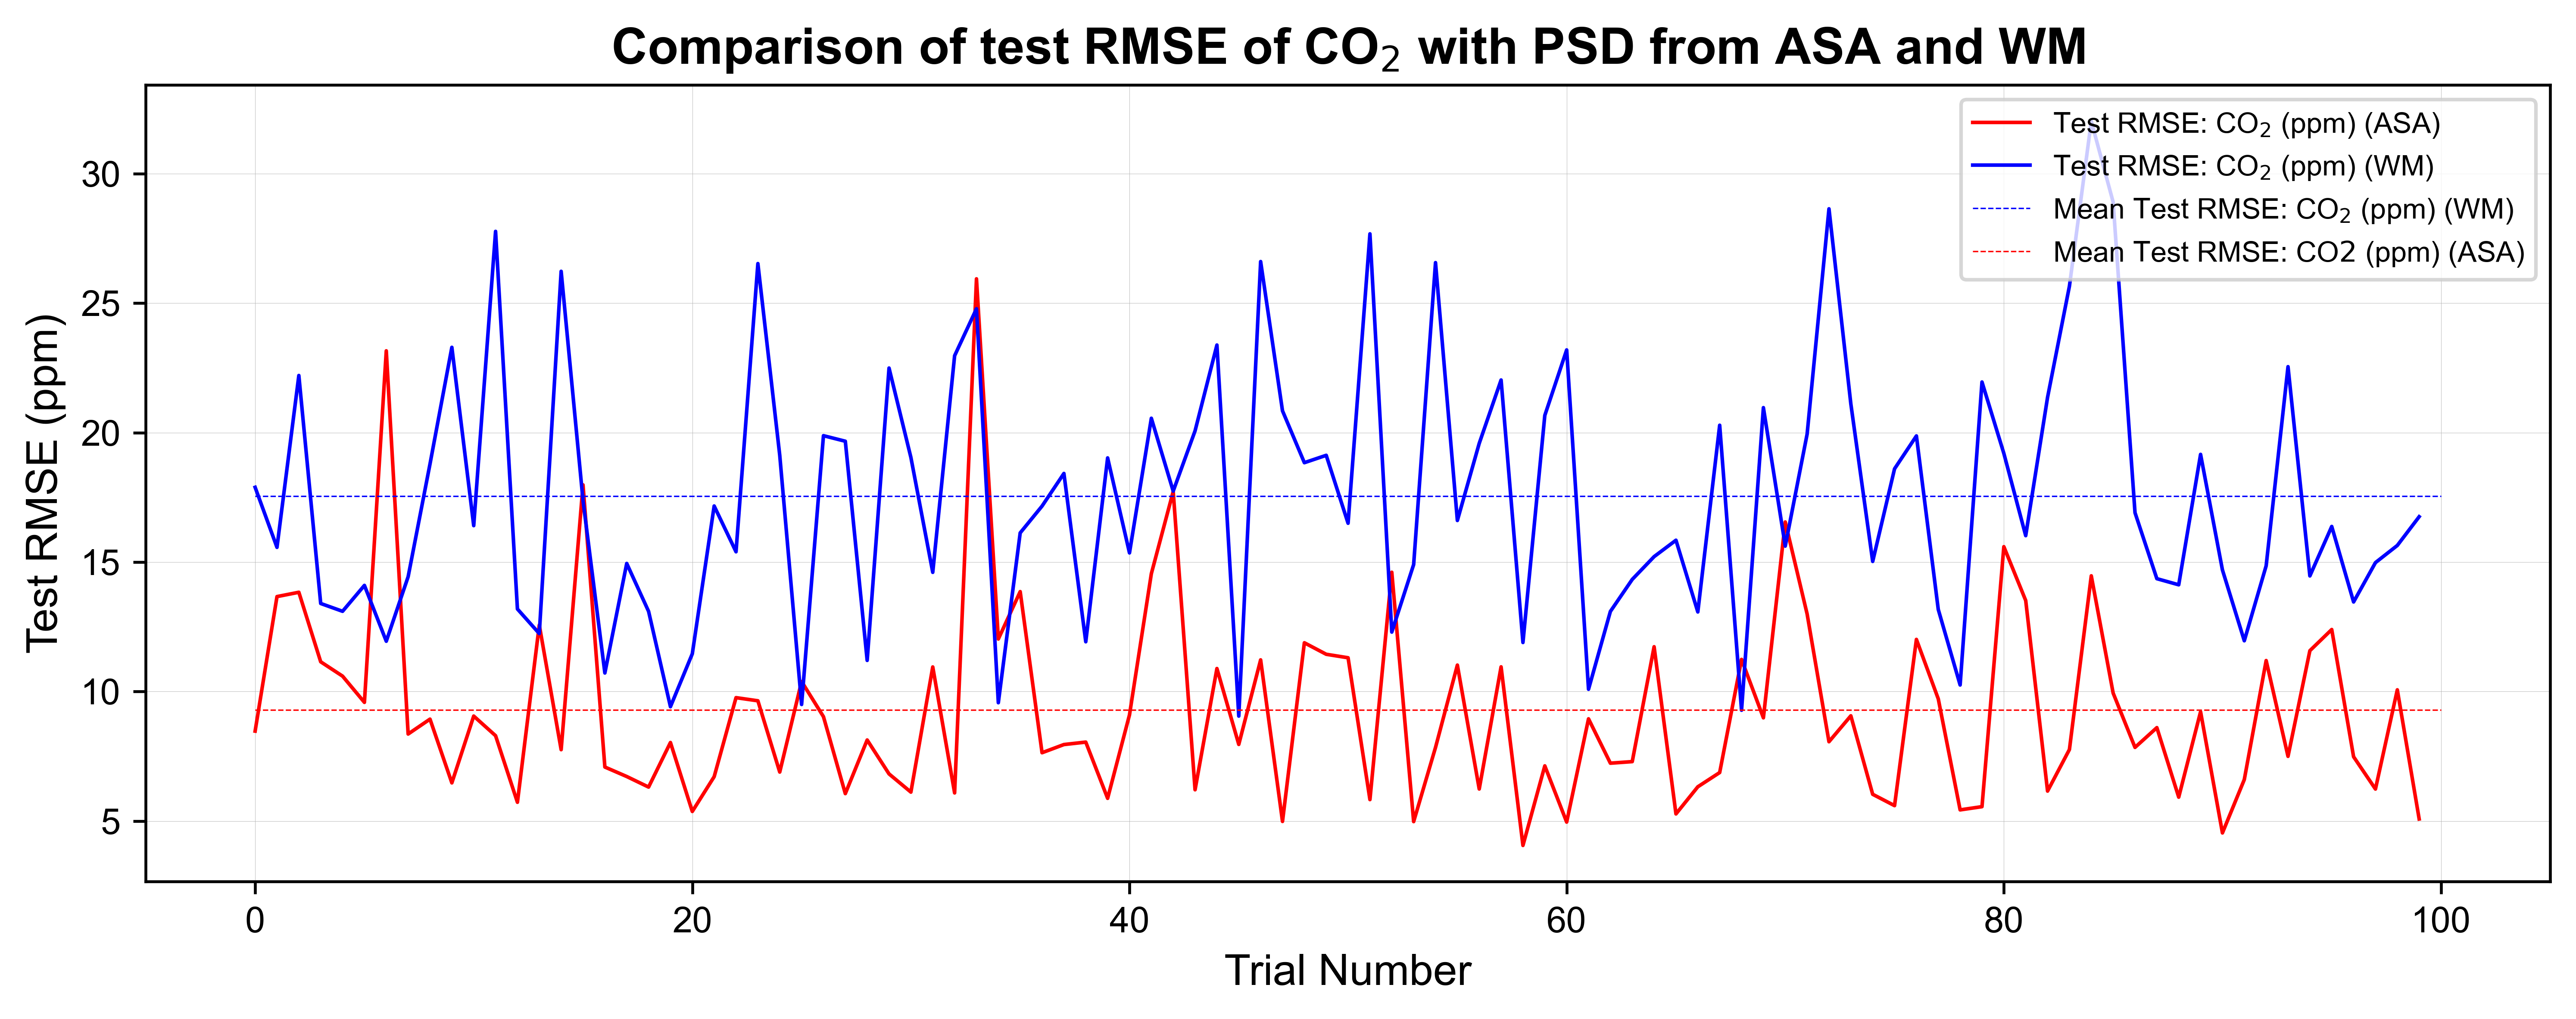

In [99]:
## Plot test RMSE of CO2 from ASA and WM
mpl.rcParams['figure.dpi'] = 600 ## change dpi
plt.rcParams['font.family'] = 'Arial' 

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df['Test RMSE: CO$_2$ (ppm) (ASA)'],label='Test RMSE: CO$_2$ (ppm) (ASA)',linewidth=1,color='red')
ax.plot(df['Test RMSE: CO$_2$ (ppm) (WM)'],label='Test RMSE: CO$_2$ (ppm) (WM)',linewidth=1,color='blue')

ax.hlines(y=CO2_WM_mean, color='blue', linestyle='--', label='Mean Test RMSE: CO$_2$ (ppm) (WM)',
                                                                             xmin=0, xmax=100, linewidth=0.4)
ax.hlines(y=CO2_ASA_mean, color='red', linestyle='--', label='Mean Test RMSE: CO$2$ (ppm) (ASA)',
                                                                            xmin=0, xmax=100, linewidth=0.4)

plt.xlabel('Trial Number', fontsize=12)
plt.ylabel('Test RMSE (ppm)',fontsize=12)
plt.title('Comparison of test RMSE of CO$_2$ with PSD from ASA and WM',fontsize=14, fontweight='bold')
plt.legend(fontsize=8)
plt.grid(axis='both',linewidth=0.1)
plt.show()